In [3]:
#task 1 Black body radiation 

import numpy as np
from scipy.integrate import quad

def integrand(z):
    #compute the integrand using the new variable
    numerator = z**3
    denominator = (1 - z)**5 * (np.exp(z / (1 - z)) - 1)
    return numerator / denominator

def radiated_energy_integral():
    
    result, _ = quad(integrand, 0, 1)
    return result


integral_value = radiated_energy_integral()
print(f"Integral result: {integral_value}")


k = 1.380649e-23  
c = 3.0e8         
h = 6.62607015e-34 


def integrand(x):
    return x**3 / (np.exp(x) - 1)

#computes the integral using scipys quad function
integral_value, _ = quad(integrand, 0, np.inf)

#calculate the SB constant
sigma = (2 * np.pi * k**4) / (c**2 * h**3) * (1 / integral_value)


print(f"Stefan-Boltzmann constant (sigma): {sigma:.6e} W/m^2 K^4") 



Integral result: 6.493939402266829
Stefan-Boltzmann constant (sigma): 1.342747e-09 W/m^2 K^4
Stefan-Boltzmann constant (sigma) using direct integration: 1.342747e-09 W/m^2 K^4


/tmp/ipykernel_1471/2172466227.py:9: RuntimeWarning: overflow encountered in exp
  denominator = (1 - z)**5 * (np.exp(z / (1 - z)) - 1)
/tmp/ipykernel_1471/2172466227.py:28: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)
/tmp/ipykernel_1471/2172466227.py:42: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


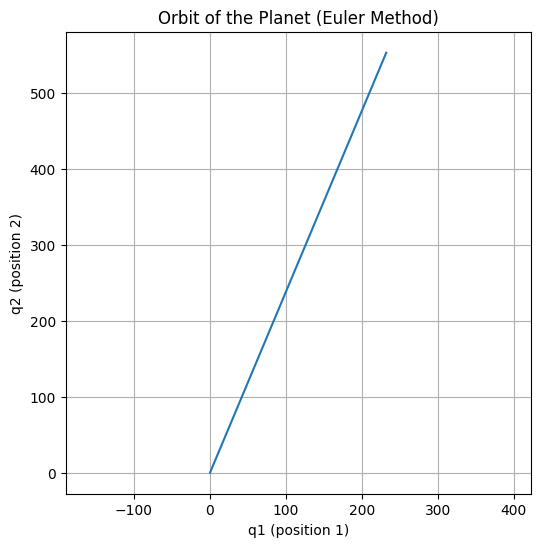

<Figure size 640x480 with 0 Axes>

In [4]:
#Task 2 A Orbits 

import numpy as np
import matplotlib.pyplot as plt


e = 0.6  
Tf = 200  
steps = 100000  
dt = Tf / steps  #time step


q1 = 1 - e
q2 = 0
p1 = 0
p2 = np.sqrt((1 + e) / (1 - e))

#arrays to store the values
q1_values = np.zeros(steps)
q2_values = np.zeros(steps)
t_values = np.linspace(0, Tf, steps)

#Euler method integration
for i in range(steps):
    #stores current positions
    q1_values[i] = q1
    q2_values[i] = q2
    
    #derivatives
    r2 = q1**2 + q2**2
    dp1 = q1 / r2**(3/2)
    dp2 = q2 / r2**(3/2)
    
    #positions and momenta using Euler method
    q1 += dt * p1
    q2 += dt * p2
    p1 += dt * dp1
    p2 += dt * dp2


plt.figure(figsize=(6, 6))
plt.plot(q1_values, q2_values)
plt.xlabel("q1 (position 1)")
plt.ylabel("q2 (position 2)")
plt.title("Orbit of the Planet (Euler Method)")
plt.axis("equal")
plt.grid(True)
plt.show() 
plt.savefig("Orbit.png")


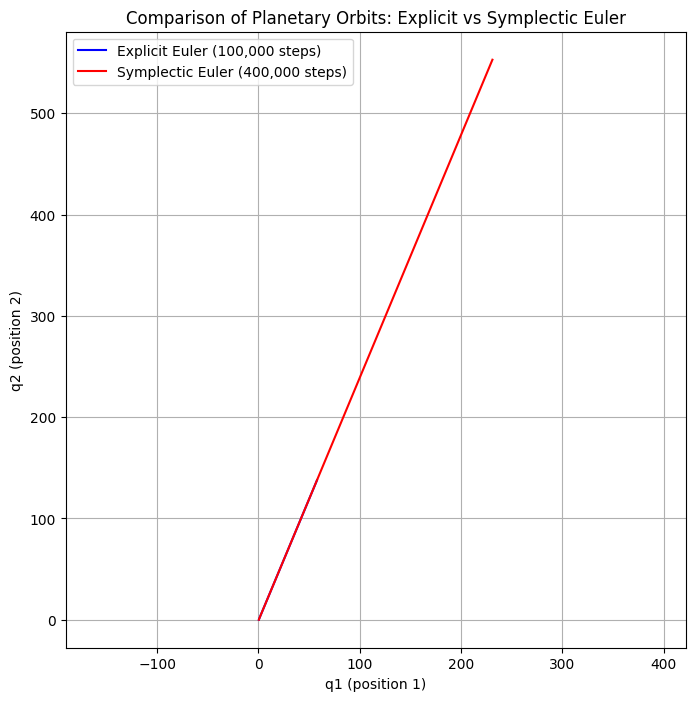

<Figure size 640x480 with 0 Axes>

In [5]:
#Task 2B  

e = 0.6  
Tf = 200  
steps = 400000  
dt = Tf / steps  


q1 = 1 - e
q2 = 0
p1 = 0
p2 = np.sqrt((1 + e) / (1 - e))

q1_values_explicit = np.zeros(100000)
q2_values_explicit = np.zeros(100000)
q1_values_symplectic = np.zeros(steps)
q2_values_symplectic = np.zeros(steps)
t_values = np.linspace(0, Tf, steps)

# 100000 steps for explicit euler as done previously 

q1_explicit = 1 - e
q2_explicit = 0
p1_explicit = 0
p2_explicit = np.sqrt((1 + e) / (1 - e))

#explicit Euler method integration
for i in range(100000):
    q1_values_explicit[i] = q1_explicit
    q2_values_explicit[i] = q2_explicit
    
    #derivatives
    r2_explicit = q1_explicit**2 + q2_explicit**2
    dp1_explicit = q1_explicit / r2_explicit**(3/2)
    dp2_explicit = q2_explicit / r2_explicit**(3/2)
    
    #update the positions and momenta 
    q1_explicit += dt * p1_explicit
    q2_explicit += dt * p2_explicit
    p1_explicit += dt * dp1_explicit
    p2_explicit += dt * dp2_explicit

#symplectic euler method integration
for i in range(steps):
    #computes the derivatives
    r2_symplectic = q1**2 + q2**2
    dp1_symplectic = q1 / r2_symplectic**(3/2)
    dp2_symplectic = q2 / r2_symplectic**(3/2)
    
    
    p1 += dt * dp1_symplectic
    p2 += dt * dp2_symplectic
    
    
    q1 += dt * p1
    q2 += dt * p2
    
    
    q1_values_symplectic[i] = q1
    q2_values_symplectic[i] = q2


plt.figure(figsize=(8, 8))
plt.plot(q1_values_explicit, q2_values_explicit, label='Explicit Euler (100,000 steps)', color='blue')
plt.plot(q1_values_symplectic, q2_values_symplectic, label='Symplectic Euler (400,000 steps)', color='red')
plt.xlabel("q1 (position 1)")
plt.ylabel("q2 (position 2)")
plt.title("Comparison of Planetary Orbits: Explicit vs Symplectic Euler")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("Orbits.png")

In [7]:
#Task 3 A

import os
from matplotlib.animation import FuncAnimation


def hamiltonian(theta):
    return theta**4 - 8*theta**2 - 2 * np.cos(4 * np.pi * theta)

def gradient(theta):
    return 4 * theta**3 - 16 * theta - 8 * np.pi * np.sin(4 * np.pi * theta)


def gradient_descent(initial_theta, learning_rate, max_iters=1000, tolerance=1e-6):
    theta = initial_theta
    theta_values = []
    for i in range(max_iters):
        
        grad = gradient(theta)
        
        
        theta = theta - learning_rate * grad
        
        
        theta_values.append(theta)
        
        if abs(grad) < tolerance:
            break
        
        learning_rate = learning_rate * 0.99  
    
    return theta, theta_values

initial_guesses = [-1, 0.5, 3]
learning_rate = 0.05
max_iters = 1000
tolerance = 1e-6

output_dir = "gradient_descent_video"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for idx, initial_theta in enumerate(initial_guesses):
    theta = initial_theta
    theta_values = []
    
    
    final_theta, theta_values = gradient_descent(initial_theta, learning_rate, max_iters, tolerance)
    
    
    for i, t in enumerate(theta_values):
        # Plot the current position
        plt.figure(figsize=(6, 6))
        plt.plot(np.linspace(-3, 3, 1000), hamiltonian(np.linspace(-3, 3, 1000)), label="Hamiltonian")
        plt.scatter(t, hamiltonian(t), color="red", label="Current θ", zorder=5)
        plt.xlabel("θ")
        plt.ylabel("H(θ)")
        plt.title(f"Gradient Descent Step {i+1} - Initial Guess: {initial_theta}")
        plt.legend()
        
        
        filename = f"{output_dir}/frame_{idx+1}_{i+1}.png"
        plt.savefig(filename)
        plt.close()


fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    ax.clear()
    
    img = plt.imread(f"{output_dir}/frame_{(frame // len(initial_guesses)) + 1}_{frame % len(initial_guesses) + 1}.png")
    ax.imshow(img)
    ax.axis("off")
    return [ax]


num_frames = max_iters * len(initial_guesses)


ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)


ani.save('gradient_descent_video.mp4', writer='ffmpeg', fps=15)
print("Video creation complete!")

FileNotFoundError: [Errno 2] No such file or directory: 'gradient_descent_video/frame_3_3.png'

Video creation complete!


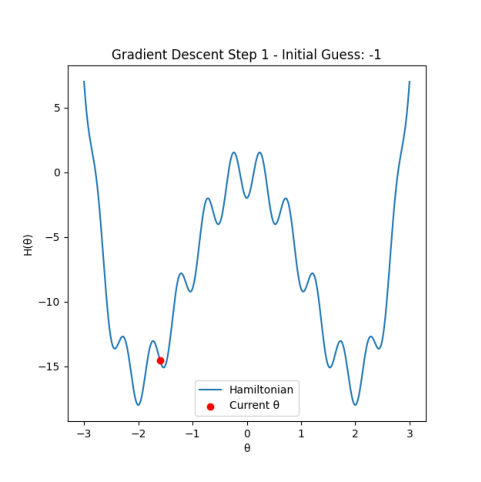

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation


def hamiltonian(theta):
    return theta**4 - 8*theta**2 - 2 * np.cos(4 * np.pi * theta)

def gradient(theta):
    return 4 * theta**3 - 16 * theta - 8 * np.pi * np.sin(4 * np.pi * theta)


def gradient_descent(initial_theta, learning_rate, max_iters=1000, tolerance=1e-6):
    theta = initial_theta
    theta_values = []
    for i in range(max_iters):
        
        grad = gradient(theta)
        
        theta = theta - learning_rate * grad
       
        theta_values.append(theta)
       
        if abs(grad) < tolerance:
            break
       
        learning_rate = learning_rate * 0.99  
    
    return theta, theta_values

initial_guesses = [-1, 0.5, 3]
learning_rate = 0.05
max_iters = 1000
tolerance = 1e-6

output_dir = "gradient_descent_video"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


frames = []

for idx, initial_theta in enumerate(initial_guesses):
    theta = initial_theta
    theta_values = []
    
    final_theta, theta_values = gradient_descent(initial_theta, learning_rate, max_iters, tolerance)
    
  
    for i, t in enumerate(theta_values):
        
        plt.figure(figsize=(6, 6))
        plt.plot(np.linspace(-3, 3, 1000), hamiltonian(np.linspace(-3, 3, 1000)), label="Hamiltonian")
        plt.scatter(t, hamiltonian(t), color="red", label="Current θ", zorder=5)
        plt.xlabel("θ")
        plt.ylabel("H(θ)")
        plt.title(f"Gradient Descent Step {i+1} - Initial Guess: {initial_theta}")
        plt.legend()
        
        filename = f"{output_dir}/frame_{idx+1}_{i+1}.png"
        plt.savefig(filename)
        plt.close()
        
        frames.append(filename)

fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    ax.clear()
  
    img = plt.imread(frames[frame])
    ax.imshow(img)
    ax.axis("off")
    return [ax]


num_frames = len(frames)


ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

ani.save('gradient_descent_video.mp4', writer='ffmpeg', fps=15)
print("Video creation complete!")


In [10]:
#Task 3B 



def hamiltonian(theta):
    return theta**4 - 8*theta**2 - 2 * np.cos(4 * np.pi * theta)


def metropolis_hastings(initial_theta, num_steps=10000, step_size=0.1):
    
    theta = initial_theta
    theta_values = [theta]
    
    for i in range(num_steps):
        
        theta_prime = theta + np.random.normal(0, step_size)
        
        
        delta_H = hamiltonian(theta_prime) - hamiltonian(theta)
        
        
        acceptance_prob = np.min([1, np.exp(-delta_H)])
        
        
        if np.random.rand() < acceptance_prob:
            theta = theta_prime
        
        
        theta_values.append(theta)
    
    return theta_values


initial_guesses = [-1, 0.5, 3]
num_steps = 10000
step_size = 0.1


for initial_theta in initial_guesses:
    theta_values = metropolis_hastings(initial_theta, num_steps, step_size)
    
    
    plt.plot(theta_values, label=f"Initial Guess: {initial_theta}")

plt.xlabel("Steps")
plt.ylabel("θ")
plt.title("Metropolis-Hastings: θ Evolution")
plt.legend()
plt.show() 
plt.savefig("Metropolis HAstings.png")


<Figure size 640x480 with 0 Axes>

In [ ]:
#Task3C 

def hamiltonian(theta):
    return theta**4 - 8*theta**2 - 2 * np.cos(4 * np.pi * theta)


def metropolis_hastings_with_cooling(initial_theta, num_steps=10000, step_size=0.1, delta=0.01, T0=1.0):
    
    theta = initial_theta
    theta_values = [theta]
    T = T0  
    
    for i in range(num_steps):
        #propose a new state by adding random noise 
        theta_prime = theta + np.random.normal(0, step_size)
        
        
        delta_H = hamiltonian(theta_prime) - hamiltonian(theta)
        
        
        acceptance_prob = np.min([1, np.exp(-delta_H / T)])
        
        
        if np.random.rand() < acceptance_prob:
            theta = theta_prime
        
       
        theta_values.append(theta)
        
        
        T = T0 / (1 + delta * i)  
    
    return theta_values


def metropolis_hastings_no_cooling(initial_theta, num_steps=10000, step_size=0.1):
   
    theta = initial_theta
    theta_values = [theta]
    
    for i in range(num_steps):
        
        theta_prime = theta + np.random.normal(0, step_size)
        
        
        delta_H = hamiltonian(theta_prime) - hamiltonian(theta)
        
        
        acceptance_prob = np.min([1, np.exp(-delta_H)])
        
       
        if np.random.rand() < acceptance_prob:
            theta = theta_prime
        
        
        theta_values.append(theta)
    
    return theta_values


initial_guesses = [-1, 0.5, 3]
num_steps = 10000
step_size = 0.1
delta = 0.01  
T0 = 1.0  


plt.figure(figsize=(10, 6))


for initial_theta in initial_guesses:
    
    theta_values_cooling = metropolis_hastings_with_cooling(initial_theta, num_steps, step_size, delta, T0)
    
    
    theta_values_no_cooling = metropolis_hastings_no_cooling(initial_theta, num_steps, step_size)
    
    
    plt.plot(theta_values_cooling, label=f"With Cooling (Initial θ = {initial_theta})", linestyle='--')
    plt.plot(theta_values_no_cooling, label=f"Without Cooling (Initial θ = {initial_theta})", linestyle='-')


plt.xlabel("Steps")
plt.ylabel("θ")
plt.title("Metropolis-Hastings: Convergence with and without Cooling")
plt.legend()
plt.show() 
plt.savefig("Convergence with and without Cooling.png")
